# 学习曲线
### 随着训练样本的逐渐增多，算法训练出的模型的表现能力


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3.0,3.0, size=100)
X = x.reshape(-1,1)
y = 0.5*x**2 + x +2 + np.random.normal(0, 1, 100)

plt.scatter(x,y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
X_train.shape

(75, 1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []

for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

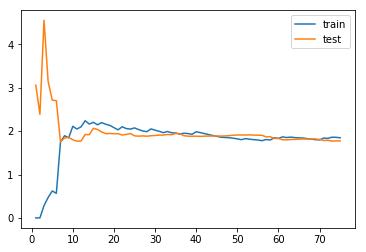

In [5]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test" )
plt.legend()
plt.show()

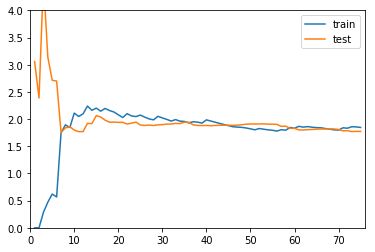

In [6]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test" )
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

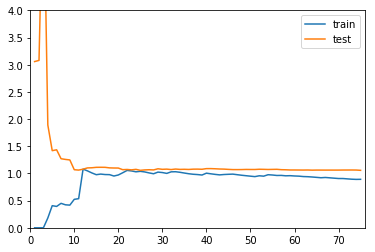

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()), #标准化
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)

plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)
# poly2_reg.fit(X_train, y_train)
# y2_predict = poly2_reg.predict(X_test)
# mean_squared_error(y_test, y2_predict)


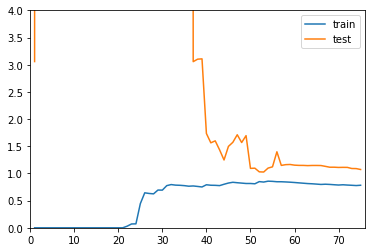

In [8]:
poly20_reg = PolynomialRegression(degree=20)

plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)